In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%204%20-%20Lesson%202%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2023-06-07 00:57:27--  https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.234.128, 142.251.172.128, 142.250.152.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.234.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2023-06-07 00:57:27 (69.8 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [11]:
import os
import rarfile

tokenizer = Tokenizer()

import os

tokenizer = Tokenizer()

# Set the path to the folder containing the text files
folder_path = '/content/your_folder_path'

# Concatenate the contents of all text files in the folder into a single string
corpus = ""
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r", encoding='utf-8') as file:
            corpus += file.read()
            # Set the path to the RAR archive
rar_file_path = '/content/technology.rar'

# Extract the RAR archive to a folder
extract_folder = '/content//Users/RSHAF/Desktop/Assignment2/technology'
with rarfile.RarFile(rar_file_path, 'r') as rf:
    rf.extractall(extract_folder)

# Concatenate the contents of all text files in the extracted folder into a single string
corpus = ""
for filename in os.listdir(extract_folder):
    if filename.endswith(".txt"):
        file_path = os.path.join(extract_folder, filename)
        with open(file_path, "r" ,encoding='utf-8') as file:
            corpus += file.read()


corpus = corpus.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{}
1


In [17]:
import os

tokenizer = Tokenizer()

# Set the path to the folder containing the text files
folder_path = '/content/extracted_files/technology'

# Concatenate the contents of all text files in the folder into a single string
corpus = ""
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r", encoding='utf-8') as file:
            corpus += file.read()


corpus = corpus.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'في': 1, 'من': 2, 'على': 3, 'doc': 4, 'docno': 5, 'technology': 6, 'url': 7, 'src': 8, 'cat': 9, 'title': 10, 'time': 11, 'abstract': 12, 'text': 13, 'أن': 14, '00': 15, 'إلى': 16, 'و': 17, 'd8': 18, 'عن': 19, 'author': 20, 'd9': 21, 'التي': 22, 'http': 23, 'مع': 24, 'شركة': 25, 'ja': 26, 'www': 27, 'jawharafm': 28, 'net': 29, 'ar': 30, 'article': 31, 'jawhara': 32, 'fm': 33, '94': 34, 'تونس': 35, '،': 36, '01': 37, 'هاتف': 38, 'الهاتف': 39, '7': 40, 'ما': 41, 'هذا': 42, 'الهواتف': 43, 'هواتف': 44, 'الذي': 45, 'هذه': 46, '2017': 47, '2016': 48, 'خلال': 49, 'الشركة': 50, 'أو': 51, 'بعد': 52, 'عبر': 53, 'هواوي': 54, 'العالم': 55, 'سامسونغ': 56, 'نوت': 57, 'كما': 58, 'موقع': 59, '\xa0': 60, '6': 61, 'اليوم': 62, 'الذكية': 63, 'أنه': 64, 'يمكن': 65, 'الجديد': 66, 'غوغل': 67, 'آيفون': 68, 'نوكيا': 69, 'لا': 70, 'قد': 71, 'a7': 72, 'حول': 73, 'تطبيق': 74, '10': 75, 'فيسبوك': 76, 'أي': 77, 'مثل': 78, 'إن': 79, 'بين': 80, 'آبل': 81, 'الموقع': 82, '5': 83, 'العام': 84, 'مليون': 85, 'التطبيق': 

In [18]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [19]:
print(xs[6])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [20]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [21]:
print(xs[5])
print(ys[5])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7]
[0. 0. 0. ... 0. 0. 0.]


In [22]:
print(tokenizer.word_index)

{'في': 1, 'من': 2, 'على': 3, 'doc': 4, 'docno': 5, 'technology': 6, 'url': 7, 'src': 8, 'cat': 9, 'title': 10, 'time': 11, 'abstract': 12, 'text': 13, 'أن': 14, '00': 15, 'إلى': 16, 'و': 17, 'd8': 18, 'عن': 19, 'author': 20, 'd9': 21, 'التي': 22, 'http': 23, 'مع': 24, 'شركة': 25, 'ja': 26, 'www': 27, 'jawharafm': 28, 'net': 29, 'ar': 30, 'article': 31, 'jawhara': 32, 'fm': 33, '94': 34, 'تونس': 35, '،': 36, '01': 37, 'هاتف': 38, 'الهاتف': 39, '7': 40, 'ما': 41, 'هذا': 42, 'الهواتف': 43, 'هواتف': 44, 'الذي': 45, 'هذه': 46, '2017': 47, '2016': 48, 'خلال': 49, 'الشركة': 50, 'أو': 51, 'بعد': 52, 'عبر': 53, 'هواوي': 54, 'العالم': 55, 'سامسونغ': 56, 'نوت': 57, 'كما': 58, 'موقع': 59, '\xa0': 60, '6': 61, 'اليوم': 62, 'الذكية': 63, 'أنه': 64, 'يمكن': 65, 'الجديد': 66, 'غوغل': 67, 'آيفون': 68, 'نوكيا': 69, 'لا': 70, 'قد': 71, 'a7': 72, 'حول': 73, 'تطبيق': 74, '10': 75, 'فيسبوك': 76, 'أي': 77, 'مثل': 78, 'إن': 79, 'بين': 80, 'آبل': 81, 'الموقع': 82, '5': 83, 'العام': 84, 'مليون': 85, 'التطبيق': 

In [23]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100
590/590 [==============================] - 126s 198ms/step - loss: 7.8198 - accuracy: 0.0394
Epoch 2/100
590/590 [==============================] - 50s 84ms/step - loss: 6.9532 - accuracy: 0.0892
Epoch 3/100
590/590 [==============================] - 35s 59ms/step - loss: 6.4527 - accuracy: 0.1204
Epoch 4/100
590/590 [==============================] - 31s 53ms/step - loss: 5.9407 - accuracy: 0.1371
Epoch 5/100
590/590 [==============================] - 26s 44ms/step - loss: 5.3461 - accuracy: 0.1547
Epoch 6/100
590/590 [==============================] - 23s 39ms/step - loss: 4.7154 - accuracy: 0.1967
Epoch 7/100
590/590 [==============================] - 23s 39ms/step - loss: 4.1013 - accuracy: 0.2557
Epoch 8/100
590/590 [==============================] - 21s 35ms/step - loss: 3.5220 - accuracy: 0.3316
Epoch 9/100
590/590 [==============================] - 22s 38ms/step - loss: 2.9974 - accuracy: 0.4262
Epoch 10/100
590/590 [==============================] - 21s 35ms/step -

In [24]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

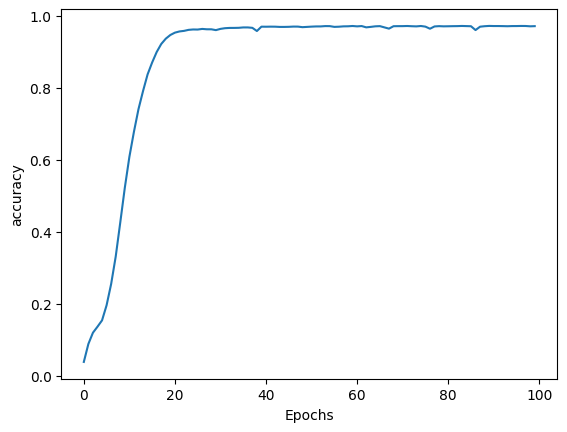

In [25]:
plot_graphs(history, 'accuracy')


In [44]:
seed_text = "شركة ابل"
next_words = 10
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 35ms/step
شركة ابل سامسونج إنها سترسل علبا مضادة للاحتراق وقفازات واقية لزبنائها الذين
